# Boosting
## Dataset: California Housing Dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [5]:
# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


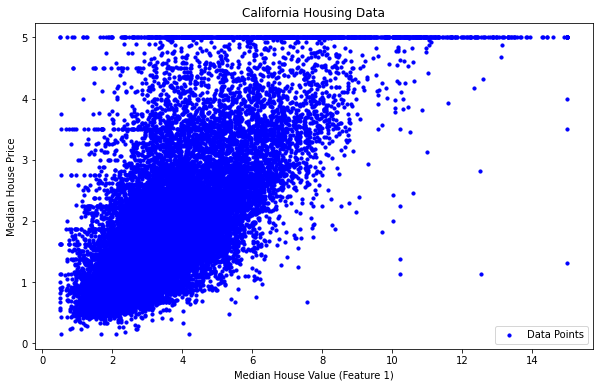

In [10]:
# Scatter plot of California Housing data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, s=10, c='b', label='Data Points')
plt.xlabel('Median House Value (Feature 1)')
plt.ylabel('Median House Price')
plt.title('California Housing Data')
plt.legend()
plt.show()


In [6]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=200, random_state=42)
ada_reg.fit(X_train, y_train)
ada_y_pred = ada_reg.predict(X_test)

print(f"AdaBoost Regressor Mean Squared Error: {mean_squared_error(y_test, ada_y_pred)}")


AdaBoost Regressor Mean Squared Error: 1.078142773322677


In [7]:
gb_reg = GradientBoostingRegressor(max_depth=4, n_estimators=200, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)
gb_y_pred = gb_reg.predict(X_test)

print(f"Gradient Boosting Regressor Mean Squared Error: {mean_squared_error(y_test, gb_y_pred)}")


Gradient Boosting Regressor Mean Squared Error: 0.2434593878541624


In [8]:
gb_reg = GradientBoostingRegressor(max_depth=4, n_estimators=200, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)
gb_y_pred = gb_reg.predict(X_test)

print(f"Gradient Boosting Regressor Mean Squared Error: {mean_squared_error(y_test, gb_y_pred)}")


Gradient Boosting Regressor Mean Squared Error: 0.2434593878541624


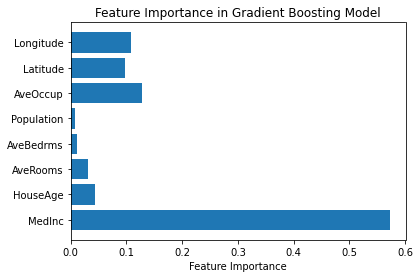

In [9]:
feature_importance = gb_reg.feature_importances_
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(california.feature_names)), california.feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


c:\Users\Lucas\miniconda3\envs\comp680\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


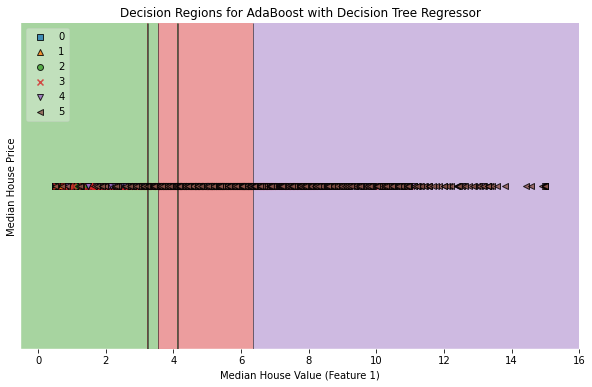

In [13]:
# Plotting decision regions for AdaBoost
from mlxtend.plotting import plot_decision_regions

# AdaBoost uses only a single feature for visualization
X_train_single = X_train[:, 0].reshape(-1, 1)
X_test_single = X_test[:, 0].reshape(-1, 1)

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=200, random_state=42)
ada_reg.fit(X_train_single, y_train)

# Convert y to integers
y_train_int = y_train.astype(np.int_)

# Plotting decision regions for AdaBoost
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_single, y_train_int, clf=ada_reg, legend=2)
plt.xlabel('Median House Value (Feature 1)')
plt.ylabel('Median House Price')
plt.title('Decision Regions for AdaBoost with Decision Tree Regressor')
plt.show()



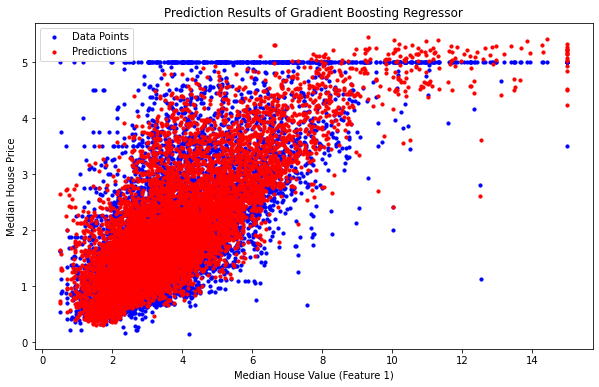

In [14]:
# Plotting the prediction results of Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(X_test_single, y_test, s=10, c='b', label='Data Points')
plt.scatter(X_test_single, gb_y_pred, s=10, c='r', label='Predictions')
plt.xlabel('Median House Value (Feature 1)')
plt.ylabel('Median House Price')
plt.title('Prediction Results of Gradient Boosting Regressor')
plt.legend()
plt.show()
